<a href="https://colab.research.google.com/github/vorobyevakatya/Comp-Linguistics/blob/main/%D0%92%D0%BE%D1%80%D0%BE%D0%B1%D1%8C%D0%B5%D0%B2%D0%B0_convnet_hw_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнее задание: бинарная классификация отзывов с помощью CNN

Применить CNN для анализа тональности текста (положительный/отрицательный отзыв)

Заполните пропущенный код (`### ВАШ КОД ЗДЕСЬ ###`). **Не меняйте структуру ячеек!** Все ответы и графики должны генерироваться автоматически

**Критерии проверки (максимум 10 баллов):**
*   **2 балла** — корректная загрузка и предобработка данных.
*   **3 балла** — корректно собранная модель по спецификации.
*   **2 балла** — успешное обучение модели (вывод истории обучения).
*   **3 балла** — оценка на тесте и выводы (accuracy > 0.85 даёт +1 балл).

---

## БЛОК 1: Загрузка данных

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/incomplete.AXV3ML_1.0.0/imdb_reviews-train.tfrecor…

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/incomplete.AXV3ML_1.0.0/imdb_reviews-test.tfrecord…

Generating unsupervised examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/incomplete.AXV3ML_1.0.0/imdb_reviews-unsupervised.…

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.
Тренировочные данные: 25000 samples
Тестовые данные: 25000 samples


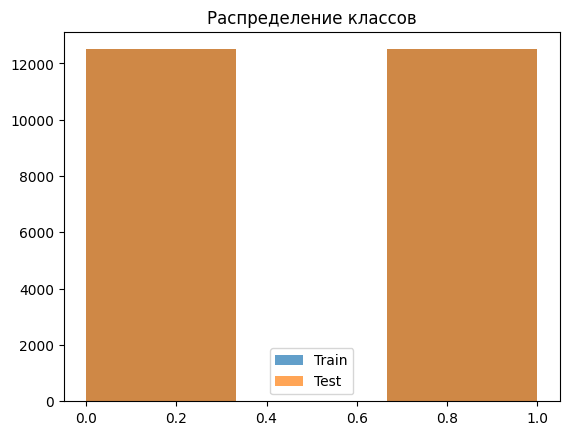

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import tensorflow_datasets as tfds

# 1. Загрузите датасет IMDB Reviews (бинарная классификация)
### ВАШ КОД ЗДЕСЬ ###
# Используйте tfds.load('imdb_reviews', split=['train', 'test'], as_supervised=True)
imdb_train, imdb_test = tfds.load(
    'imdb_reviews',
    split=['train', 'test'],
    as_supervised=True,
    shuffle_files=True
)
# Преобразуйте данные в numpy массивы (x_train, y_train), (x_test, y_test)
x_train, y_train = [], []
x_test, y_test = [], []

for text, label in tfds.as_numpy(imdb_train):
    x_train.append(text.decode('utf-8'))
    y_train.append(label)

for text, label in tfds.as_numpy(imdb_test):
    x_test.append(text.decode('utf-8'))
    y_test.append(label)

x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

print(f"Тренировочные данные: {len(x_train)} samples")
print(f"Тестовые данные: {len(x_test)} samples")

# 2. Визуализируйте распределение классов
plt.hist(y_train, bins=3, alpha=0.7, label='Train')
plt.hist(y_test, bins=3, alpha=0.7, label='Test')
plt.legend()
plt.title('Распределение классов')
plt.show()

## БЛОК 2: Предобработка текста

In [5]:
# 3. Создайте текстовый векторзатор (TextVectorization)
# Ограничьте словарь 10_000 самых частых слов, максимальную длину последовательности — 200 слов
### ВАШ КОД ЗДЕСЬ ###
# vectorizer = keras.layers.TextVectorization(max_tokens=..., output_sequence_length=...)
vectorizer = keras.layers.TextVectorization(
    max_tokens=10000,  # Ограничение словаря 10_000 самых частых слов
    output_sequence_length=200,  # Максимальная длина последовательности 200 слов
    output_mode='int'
)

# 4. Адаптируйте векторзатор на тренировочных текстах
### ВАШ КОД ЗДЕСЬ ###
# vectorizer.adapt(...)
vectorizer.adapt(x_train)

vocab = vectorizer.get_vocabulary()
print(f"Размер словаря: {len(vocab)} токенов")
print(f"Примеры самых частых слов: {vocab[:10]}")
print(f"Примеры редких слов: {vocab[-10:]}")

# 5. Примените векторзацию к данным
x_train_vec = vectorizer(x_train).numpy()
x_test_vec = vectorizer(x_test).numpy()

print(f"Размерность после векторизации: {x_train_vec.shape}")

Размер словаря: 10000 токенов
Примеры самых частых слов: ['', '[UNK]', np.str_('the'), np.str_('and'), np.str_('a'), np.str_('of'), np.str_('to'), np.str_('is'), np.str_('in'), np.str_('it')]
Примеры редких слов: [np.str_('inch'), np.str_('inc'), np.str_('imdbs'), np.str_('hosts'), np.str_('holidays'), np.str_('historians'), np.str_('hiring'), np.str_('hi'), np.str_('hawaii'), np.str_('hardships')]
Размерность после векторизации: (25000, 200)


## БЛОК 3: Построение модели

In [6]:
# 6. Постройте модель CNN для текста СТРОГО ПО СПЕЦИФИКАЦИИ:
#    - Вход: векторная последовательность (200,)
#    - Embedding: размерность 128, входной словарь 10_000
#    - Conv1D: 64 фильтра, размер ядра 5, активация 'relu'
#    - GlobalMaxPooling1D
#    - Dense: 32 нейрона, 'relu'
#    - Dense: 1 нейрон, 'sigmoid' (бинарная классификация)
### ВАШ КОД ЗДЕСЬ ###
# model = keras.Sequential([...])
model = keras.Sequential([
    keras.Input(shape=(200,), dtype='int64'),

    keras.layers.Embedding(
        input_dim=10000,
        output_dim=128,
        input_length=200
    ),

    keras.layers.Conv1D(
        filters=64,
        kernel_size=5,
        activation='relu'
    ),

    keras.layers.GlobalMaxPooling1D(),

    keras.layers.Dense(
        units=32,
        activation='relu'
    ),

    keras.layers.Dense(
        units=1,
        activation='sigmoid'
    )
])

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 200, 128)       │     1,280,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ (None, 196, 64)        │        41,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d            │ (None, 64)             │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,323,137 (5.05 MB)

 Trainable params: 1,323,137 (5.05 MB)

 Non-trainable params: 0 (0.00 B)

## БЛОК 4: Обучение

Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 51s 77ms/step - accuracy: 0.6888 - loss: 0.5565 - precision: 0.6778 - recall: 0.7140 - val_accuracy: 0.8610 - val_loss: 0.3166 - val_precision: 0.8660 - val_recall: 0.8582
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 46s 73ms/step - accuracy: 0.9246 - loss: 0.2022 - precision: 0.9212 - recall: 0.9274 - val_accuracy: 0.8618 - val_loss: 0.3211 - val_precision: 0.8558 - val_recall: 0.8744
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 48s 76ms/step - accuracy: 0.9898 - loss: 0.0492 - precision: 0.9883 - recall: 0.9911 - val_accuracy: 0.8638 - val_loss: 0.4113 - val_precision: 0.8477 - val_recall: 0.8910
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 44s 71ms/step - accuracy: 0.9987 - loss: 0.0077 - precision: 0.9996 - recall: 0.9979 - val_accuracy: 0.8534 - val_loss: 0.5225 - val_precision: 0.8130 - val_recall: 0.9226
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 46s 73ms/step - accuracy: 0.9998 - loss: 0.0019 - precision: 0.9995 - recall: 1.0000 - val_accuracy: 0.8694 - val_los

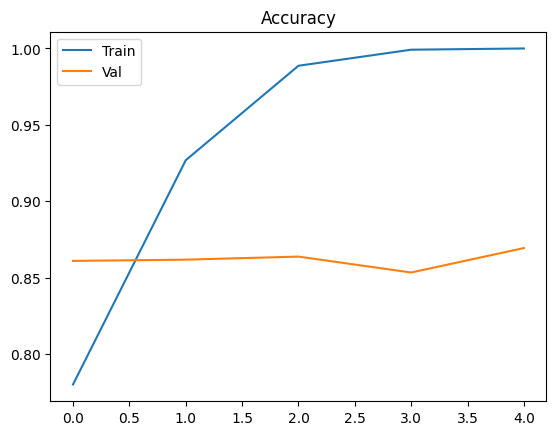

In [7]:
# 7. Скомпилируйте модель с оптимизатором 'adam', функцией потерь 'binary_crossentropy',
#    метриками ['accuracy', 'Precision', 'Recall']
### ВАШ КОД ЗДЕСЬ ###
# model.compile(...)
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy', keras.metrics.Precision(), keras.metrics.Recall()]
)

# 8. Обучите модель на 5 эпох с validation_split=0.2, batch_size=32
### ВАШ КОД ЗДЕСЬ ###
# history = model.fit(...)
history = model.fit(
    x_train_vec,
    y_train,
    epochs=5,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

# 9. Постройте график точности (accuracy) на обучении и валидации
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Val')
plt.title('Accuracy')
plt.legend()
plt.show()

## БЛОК 5: Оценка

In [8]:
# 10. Оцените модель на тестовых данных
### ВАШ КОД ЗДЕСЬ ###
# test_loss, test_acc, test_prec, test_rec = model.evaluate(...)
test_loss, test_acc, test_prec, test_rec = model.evaluate(
    x_test_vec,
    y_test,
    batch_size=32,
    verbose=0
)

print(f"Тестовая accuracy: {test_acc:.4f}")
print(f"Тестовая precision: {test_prec:.4f}")
print(f"Тестовая recall: {test_rec:.4f}")

# 11. Сделайте предсказания на первых 10 тестовых отзывах
#     и выведите: текст отзыва, истинный класс, предсказанный класс, вероятность
for i in range(10):
    text = x_test[i]
    true_label = "POS" if y_test[i] == 1 else "NEG"
    ### ВАШ КОД ЗДЕСЬ ###
    # pred_prob = model.predict(...)
    # pred_label = "POS" if pred_prob > 0.5 else "NEG"
    pred_prob = model.predict(x_test_vec[i:i+1], verbose=0)
    pred_label = "POS" if pred_prob[0][0] > 0.5 else "NEG"

    print(f"{text[:50]}... | True: {true_label} | Pred: {pred_label} ({pred_prob[0][0]:.2f})")

Тестовая accuracy: 0.8653
Тестовая precision: 0.8648
Тестовая recall: 0.8660
There are films that make careers. For George Rome... | True: POS | Pred: POS (0.99)
A blackly comic tale of a down-trodden priest, Naz... | True: POS | Pred: POS (0.97)
Scary Movie 1-4, Epic Movie, Date Movie, Meet the ... | True: NEG | Pred: NEG (0.00)
Poor Shirley MacLaine tries hard to lend some grav... | True: NEG | Pred: NEG (0.00)
As a former Erasmus student I enjoyed this film ve... | True: POS | Pred: POS (1.00)
My God, Ryan Gosling has made a lot of deep charac... | True: POS | Pred: POS (1.00)
This film just won the best film award at the Clev... | True: POS | Pred: POS (1.00)
The cast for this production of Rigoletto is excel... | True: POS | Pred: POS (1.00)
As long as you keep in mind that the production of... | True: NEG | Pred: NEG (0.19)
Every great once in a while, you stumble upon a mo... | True: POS | Pred: NEG (0.03)


## БЛОК 6: Выводы

**Ответьте на вопросы в этой ячейке (текстом):**

1.  Какая итоговая точность (accuracy) на тесте?
2.  Что показывает разница между точностью на обучении и валидации? Есть ли переобучение?
3.  Какой из 10 показанных отзывов был классифицирован неверно? Почему, на ваш взгляд?

**Мои ответы:**
1.  0.8653
2.  На диаграмме, полученной в 4 блоке видно, что точность на обучении близка к 100, а на валидации примерно 86-87, что указывает на переобучение.
3.  Неверно классифицирован только 10ый пример. Это может быть связано с тем, что предложение в целом сложно сформулировано, использованы редкие языковые обороты "once in a while". Кроме того, есть слова, имеющие противоположные коннотации: "great" - позитивную, "stumble" - скорее негативную.